In [68]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

In [22]:
embeddings_ACCP = pd.read_csv("/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Output/2024-05-17/17-33-50_137/ACCP_epoch60_embeddings/full_embeddings.csv", index_col=0)
labels_ACCP = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/subjects_labels.csv")
labels_ACCP = labels_ACCP[['long_name','Left_PCS']]
def encoder(df, col):
    code = {'present':1,
            'absent':0}
    df[col] = df[col].map(code)
    return df
encoder(labels_ACCP,'Left_PCS') 
embeddings_ACCP.head()

dim1       dim2       dim3       dim4       dim5  \
ID                                                                    
1-03HUBJO_t0  -3.491903   9.964356   7.955076   1.935912  -3.250543   
1-08ANDTI_t0  28.615093  11.292289  16.397621  -7.627883 -21.860220   
1-11LEBJO_t0  23.559963   3.498710   0.762722 -26.237368  -1.551107   
1-15LEHMI_t0 -10.663214  -9.185373  13.697080   2.573566 -17.312372   
1-17COLMA_t0  36.387077  23.316149  33.182842 -19.127281   8.082149   

                   dim6       dim7       dim8       dim9      dim10  ...  \
ID                                                                   ...   
1-03HUBJO_t0  -2.123848 -17.627539   2.709211  22.315190 -35.593970  ...   
1-08ANDTI_t0  23.716585  10.394909  13.928088  11.379738   1.379860  ...   
1-11LEBJO_t0 -16.322780  -8.027464  15.963725  10.920575 -16.815820  ...   
1-15LEHMI_t0  -5.681951 -20.241114  29.199180  -0.584006 -33.414350  ...   
1-17COLMA_t0   3.276061   0.840608  13.971827 -12.606335   6.062189  ...   

                 dim247     dim248     dim249     dim250     dim251  \
ID                                                                    
1-03HUBJO_t0 -14.108142 -23.009981  -2.837372  10.779960 -17.563130   
1-08ANDTI_t0  -9.998352 -16.397510   3.712017   2.651893 -15.697700   
1-11LEBJO_t0 -27.188520 -18.213110  -1.925706  17.525993   4.222296   
1-15LEHMI_t0 -21.883749 -32.307686 -10.627143   6.912456   5.173758   
1-17COLMA_t0  -7.332829 -52.288170  16.061089   0.932191  -0.549337   

                 dim252     dim253     dim254    dim255     dim256  
ID                                                                  
1-03HUBJO_t0  13.142447   0.280698  -2.536255 -0.930954  -7.264161  
1-08ANDTI_t0  17.927643 -18.302980  -7.324070 -8.513566  15.891581  
1-11LEBJO_t0  -9.231873   1.527323  -7.650638 -3.964854   4.153041  
1-15LEHMI_t0  -9.602927 -29.568752  18.952961 -9.666801   4.406162  
1-17COLMA_t0 -24.659771 -17.137640  17.976954 -1.725836  27.078934  

[5 rows x 256 columns]

In [3]:
embeddings_HCP = pd.read_csv("/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Output/2024-05-17/17-33-50_137/HCP_epoch60_embeddings/full_embeddings.csv", index_col=0)
embeddings_HCP.head()

dim1       dim2       dim3       dim4       dim5       dim6  \
ID                                                                         
100206 -24.917880 -10.673243  31.255718 -14.478464   8.360127   9.927284   
100307  12.314554  11.594121  13.307158 -31.369896   7.620007  19.986906   
100408  20.813276   3.623191  38.722008 -23.177960  16.610842   3.435390   
100610  23.105474 -13.484158   3.034245 -36.565360  -2.356708   4.431172   
101006  -4.921755   7.155756  26.192656  -3.164310   1.616181  -8.191695   

             dim7       dim8       dim9      dim10  ...     dim247     dim248  \
ID                                                  ...                         
100206   2.550213  10.874438   7.411881   1.187276  ...  11.120356  -1.787396   
100307  -3.377792  12.507202  -0.334976   0.692380  ...   7.435789 -26.681438   
100408  10.889226  -2.223411  -8.859007   7.737382  ... -39.144306 -37.228294   
100610  25.246935   7.577326 -31.271326  18.277721  ... -21.295162  -9.036210   
101006 -30.146220  -2.800916  13.598273  -6.912625  ... -23.606762 -12.804541   

           dim249     dim250     dim251     dim252     dim253     dim254  \
ID                                                                         
100206  -7.730851  30.205887 -18.208553 -17.427822 -47.337750  -9.245305   
100307  24.532467  32.085450 -12.200564 -44.108162 -38.481830  -4.778722   
100408  -3.418950  24.074074  -7.853890   1.814369 -19.583284   3.847825   
100610  18.312103  11.303175 -12.831594   5.909308  -4.327903  -5.094877   
101006 -27.089450   5.510329  28.811680 -12.628745 -12.914171 -12.730132   

          dim255     dim256  
ID                           
100206 -6.999600   4.180949  
100307 -6.047495   3.458181  
100408  0.174430  21.382510  
100610 -1.655752   7.903294  
101006 -5.261444  -1.529659  

[5 rows x 256 columns]

In [4]:
embeddings_UKB = pd.read_csv("/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Output/2024-05-17/17-33-50_137/UKB_epoch60_embeddings/full_embeddings.csv", index_col=0)
embeddings_UKB.head()

dim1       dim2       dim3       dim4       dim5      dim6  \
ID                                                                             
sub-1000021   4.984328   5.862696  35.545628  21.530850 -15.400157  4.803300   
sub-1000458   9.681720 -17.024338 -21.298676 -10.950365  22.326513 -8.129682   
sub-1000575  -4.692525 -26.790430  30.774847 -11.931572  11.357469  0.343410   
sub-1000606  -7.469733  -1.329392  21.345432   0.904605  10.759202 -2.359774   
sub-1000963 -21.217674  -1.909686  -5.333684  10.033036  -7.345963 -9.958603   

                  dim7       dim8       dim9      dim10  ...    dim247  \
ID                                                       ...             
sub-1000021  -3.270256  17.673480   5.964229  10.379309  ... -5.588728   
sub-1000458 -18.481632  -4.854505  19.746336 -11.974570  ... -3.582124   
sub-1000575   6.613949 -11.375133 -20.105026   3.176765  ...  4.907033   
sub-1000606 -38.278050  -3.586395  13.992952  -6.504960  ... -6.491087   
sub-1000963  -5.830301  -1.839255  22.282500 -18.502360  ... -1.436800   

                dim248     dim249    dim250     dim251     dim252     dim253  \
ID                                                                             
sub-1000021   1.781751  -6.887294  4.123653  -3.004085  24.731771   5.531009   
sub-1000458 -40.108284   7.882350 -8.344917 -11.103089 -21.647219  -2.470874   
sub-1000575   3.553167  25.210009 -7.363922  -9.255467  -2.145081 -12.499691   
sub-1000606 -10.040780   3.959444 -7.020837  22.448591 -41.282510  -9.342698   
sub-1000963 -49.797806 -12.431572 -9.649385  -5.362879   3.641441  -5.760827   

                dim254     dim255    dim256  
ID                                           
sub-1000021  -5.475274  -2.560727  0.488364  
sub-1000458 -20.251673  -7.385629  5.577127  
sub-1000575  -5.062853   2.040080 -6.979667  
sub-1000606   7.340107 -12.833817 -6.211372  
sub-1000963  -3.505362  -7.708777 -5.034035  

[5 rows x 256 columns]

In [5]:
embeddings_UKB.describe()

dim1          dim2          dim3          dim4          dim5  \
count  21051.000000  21051.000000  21051.000000  21051.000000  21051.000000   
mean       3.841567      1.620244     18.847719    -10.227820     -3.111100   
std       19.968066     15.340474     19.129552     17.267069     14.144989   
min      -62.805428    -50.715800    -42.047615    -71.860374    -51.933483   
25%      -10.204621     -8.752862      5.284082    -22.256177    -12.873419   
50%        3.317703      1.482249     18.574707    -10.028864     -3.044579   
75%       17.725704     12.193891     32.034088      2.543337      7.033924   
max       68.724960     49.781727     80.166690     39.725456     41.473732   

               dim6          dim7          dim8          dim9         dim10  \
count  21051.000000  21051.000000  21051.000000  21051.000000  21051.000000   
mean      -0.111265     -3.973066      4.433188      0.421577     -0.800205   
std       10.945310     16.330831     13.116969     13.153542     13.938989   
min      -36.923946    -51.233920    -37.029396    -46.170433    -47.938530   
25%       -7.842700    -15.929363     -4.884211     -8.321715    -10.487747   
50%       -0.278623     -4.132816      4.099962      0.396925     -0.661234   
75%        7.336060      7.575527     13.725966      9.478597      9.029353   
max       38.313300     51.451195     47.832190     45.585030     41.446156   

       ...        dim247        dim248        dim249        dim250  \
count  ...  21051.000000  21051.000000  21051.000000  21051.000000   
mean   ...     -7.196578    -19.542389      3.522057     -0.904291   
std    ...     16.352473     19.406087     17.065581     15.137502   
min    ...    -63.584890    -84.190125    -43.774830    -49.288660   
25%    ...    -18.432614    -33.107914     -9.535244    -10.708429   
50%    ...     -7.636653    -18.966244      2.952807      0.270562   
75%    ...      3.455513     -5.264210     16.240396      9.824300   
max    ...     53.637825     39.477203     57.118862     43.438747   

             dim251        dim252        dim253        dim254        dim255  \
count  21051.000000  21051.000000  21051.000000  21051.000000  21051.000000   
mean      -2.232249     -5.092326     -8.185786     -2.016345     -4.463603   
std       15.811737     17.793527     13.943789     14.292326      8.876611   
min      -65.163240    -67.743420    -52.671986    -46.354565    -36.994934   
25%      -12.711391    -17.449329    -17.897590    -12.313573    -10.503204   
50%       -1.430487     -5.401129     -7.895948     -2.351100     -4.509903   
75%        9.087385      7.246145      1.607481      8.062034      1.410824   
max       46.946495     51.648968     39.357998     43.834747     31.324638   

             dim256  
count  21051.000000  
mean      -0.592736  
std       11.553071  
min      -37.980602  
25%       -8.645848  
50%       -0.975398  
75%        7.232290  
max       39.676228  

[8 rows x 256 columns]

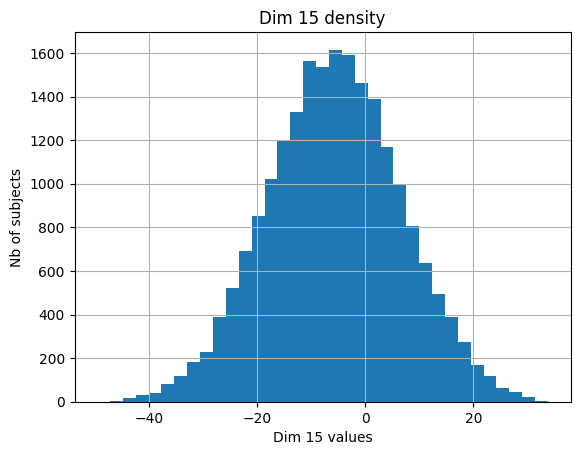

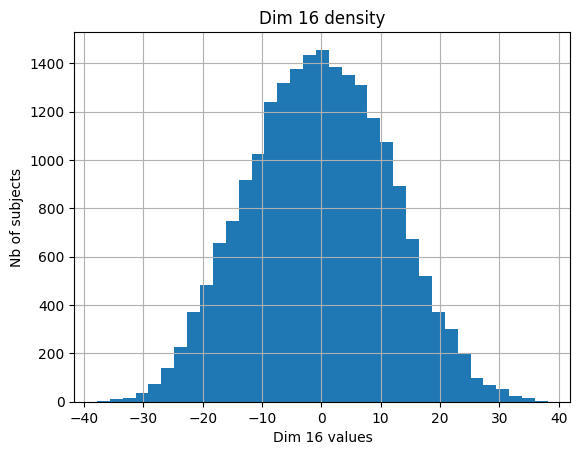

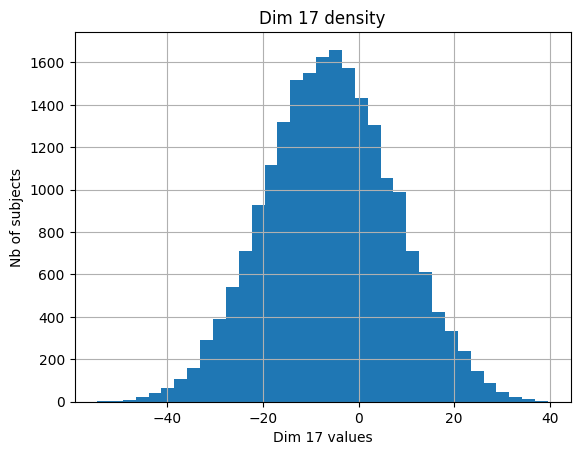

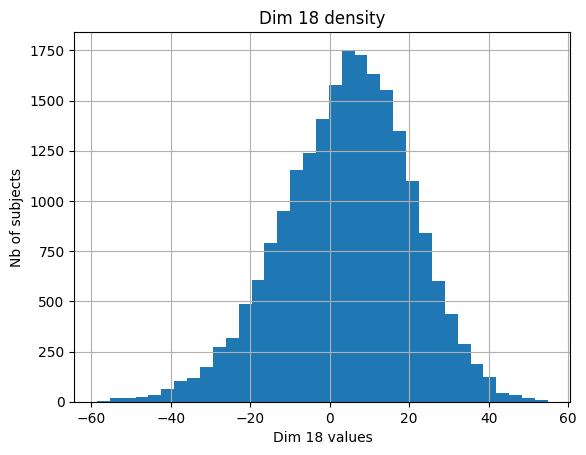

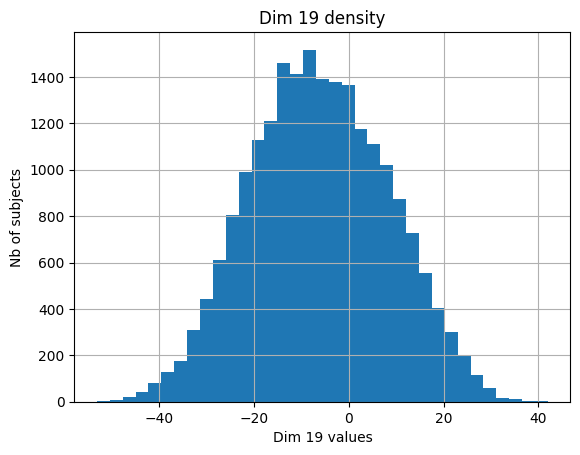

In [6]:
for i in range(15, 20):
    embeddings_UKB[f'dim{i}'].hist(bins=35)
    plt.ylabel(f'Nb of subjects')
    plt.xlabel(f'Dim {i} values')
    plt.title(f'Dim {i} density')
    plt.show()

In [7]:
scaler = StandardScaler()
scaler.fit(embeddings_UKB)

scl_bdd_hcp = scaler.transform(embeddings_HCP)
scl_bdd_ukb = scaler.transform(embeddings_UKB)
scl_bdd_accp = scaler.transform(embeddings_ACCP)

scl_bdd_hcp.shape ,scl_bdd_ukb.shape, scl_bdd_accp.shape

((1114, 256), (21051, 256), (341, 256))

In [8]:
data = scl_bdd_ukb
#data = scl_bdd_accp

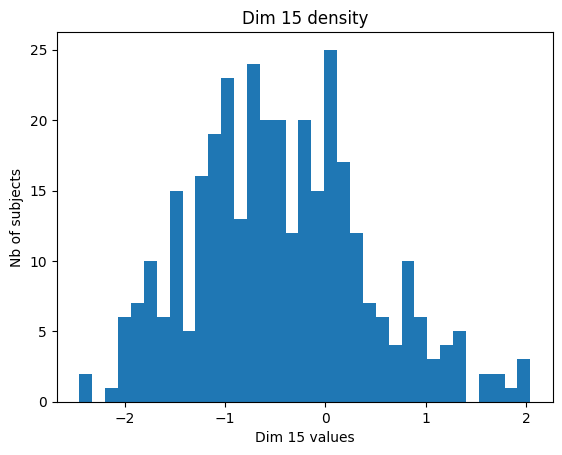

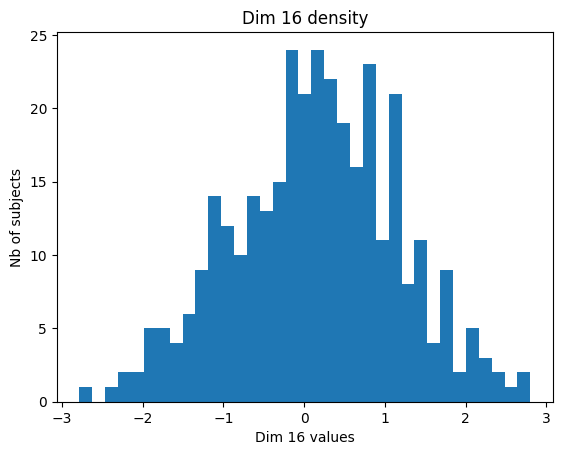

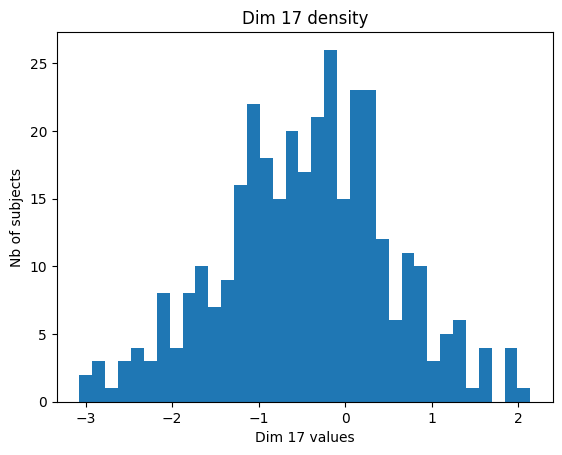

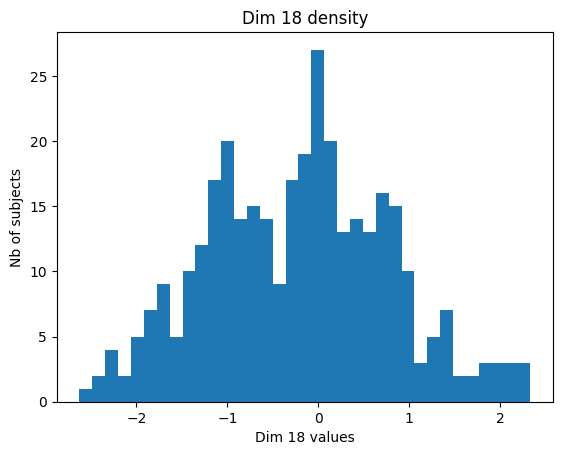

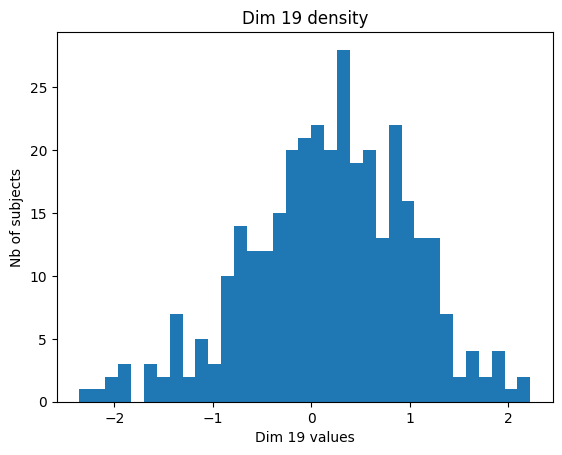

In [9]:
for i in range(15, 20):
    plt.hist(scl_bdd_accp[:,i], bins=35)
    plt.ylabel(f'Nb of subjects')
    plt.xlabel(f'Dim {i} values')
    plt.title(f'Dim {i} density')
    plt.show()

In [10]:
clusterers = {
        "KMeans": KMeans,
        #"AffinityPropagation": AffinityPropagation,
        #"MeanShift": MeanShift,
        #"SpectralClustering": SpectralClustering,
        "AgglomerativeClustering": AgglomerativeClustering,
        #"DBSCAN": DBSCAN,
        #"HDBSCAN": HDBSCAN, 
        #"OPTICS": OPTICS
    }

In [11]:
# Define a function to calculate silhouette scores for different clustering methods
def calculate_clustering_scores(data):     
    results = {}
    
    for name, clusterer in clusterers.items():
        if name == "KMeans":
            best_sil_score = -1
            best_cal_score = -1
            best_n_clusters = None
            for n_clusters in range(2, 30):
                print(f'k-means with {n_clusters} clusters')
                model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
                labels = model.fit_predict(data)
                sil_score = silhouette_score(data, labels)
                cal_score = calinski_harabasz_score(data, labels)
                if sil_score > best_sil_score:
                    best_sil_score = sil_score
                    best_cal_score = cal_score
                    best_n_clusters = n_clusters
            results[name] = (best_n_clusters, best_sil_score, best_cal_score)
        elif name == "DBSCAN":
            print(f'DBSCAN')
            model = DBSCAN()
            labels = model.fit_predict(data)
            sil_score = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
            cal_score = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else -1
            results[name] = (None, sil_score, cal_score)
        else:
            print(f'{name}')
            model = clusterer()
            labels = model.fit_predict(data)
            sil_score = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
            cal_score = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else -1
            results[name] = (None, sil_score, cal_score)
    
    return results

In [12]:
# Calculate silhouette scores for the HCP data
clustering_scores = calculate_clustering_scores(data)

k-means with 2 clusters
k-means with 3 clusters
k-means with 4 clusters
k-means with 5 clusters
k-means with 6 clusters
k-means with 7 clusters
k-means with 8 clusters
k-means with 9 clusters
k-means with 10 clusters
k-means with 11 clusters
k-means with 12 clusters
k-means with 13 clusters
k-means with 14 clusters
k-means with 15 clusters
k-means with 16 clusters
k-means with 17 clusters
k-means with 18 clusters
k-means with 19 clusters
k-means with 20 clusters
k-means with 21 clusters
k-means with 22 clusters
k-means with 23 clusters
k-means with 24 clusters
k-means with 25 clusters
k-means with 26 clusters
k-means with 27 clusters
k-means with 28 clusters
k-means with 29 clusters
AgglomerativeClustering


In [13]:
# Print the results
for name, (n_clusters, sil_score, cal_score) in clustering_scores.items():
    print(f"{name}: Best number of clusters = {n_clusters}, Silhouette score = {sil_score:.2f}, Calinski-Harabasz score = {cal_score:.2f}")

KMeans: Best number of clusters = 2, Silhouette score = 0.08, Calinski-Harabasz score = 1832.44
AgglomerativeClustering: Best number of clusters = None, Silhouette score = 0.06, Calinski-Harabasz score = 1208.19


In [14]:
# Visualize the clusters using UMAP
reducer = umap.UMAP()
reducer.fit(scl_bdd_ukb)

/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Program/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [15]:
bdd_2D_HCP = reducer.transform(scl_bdd_hcp)
bdd_2D_UKB = reducer.transform(scl_bdd_ukb)
bdd_2D_ACCP = reducer.transform(scl_bdd_accp)

bdd_2D_HCP = pd.DataFrame(bdd_2D_HCP, columns=['Dim 1', 'Dim 2'])
bdd_2D_UKB = pd.DataFrame(bdd_2D_UKB, columns=['Dim 1', 'Dim 2'])
bdd_2D_ACCP = pd.DataFrame(bdd_2D_ACCP, columns=['Dim 1', 'Dim 2'])

bdd_2D_HCP['Dataset'] = 'hcp'
bdd_2D_UKB['Dataset'] = 'UkBioBank'
bdd_2D_ACCP['Dataset'] = 'ACCpatterns'

bdd_2D_HCP['ID'] = embeddings_HCP.index
bdd_2D_UKB['ID'] = embeddings_UKB.index
bdd_2D_UKB['ID'] = bdd_2D_UKB["ID"].apply(lambda x: x[4:])
bdd_2D_UKB['ID'] = bdd_2D_UKB["ID"].astype(int)
bdd_2D_ACCP['ID'] = embeddings_ACCP.index

pred_HCP = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/HCP_binary_pred_left_PCS.csv')
pred_UKB = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/UKB_binary_pred.csv')


bdd_2D_HCP = pd.merge(left=bdd_2D_HCP,right=pred_HCP, how='inner', left_on='ID', right_on='IID')
bdd_2D_UKB = pd.merge(left=bdd_2D_UKB,right=pred_UKB, how='inner', left_on='ID', right_on='IID')
bdd_2D_ACCP = pd.merge(left=bdd_2D_ACCP, right=labels_ACCP, left_on='ID', right_on='long_name')

bdd_2D_HCP['Pred'] = bdd_2D_HCP['Pred'].astype(str)
bdd_2D_UKB['Binary_Pred'] = bdd_2D_UKB['Binary_Pred'].astype(str)
bdd_2D_ACCP['Left_PCS'] = bdd_2D_ACCP['Left_PCS'].astype(str)


In [66]:
def visualize_clusters(data, classes, title):
    
    fig = px.scatter(
        data, x='Dim 1', y='Dim 2', 
        color=classes,
        title=title,
        labels={'0': 'dim 1', '1': 'dim 2'},
        hover_data= ['Dataset', 'ID'],
        opacity=0.5,
        width=800, height=600
)
    fig.show()

In [67]:
# Visualize the best clustering results
for name, (n_clusters, sil_score, cal_score) in clustering_scores.items():
    if n_clusters:
        model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
        labels = model.fit_predict(data)
    elif name == "DBSCAN":
        model = DBSCAN()
        labels = model.fit_predict(data)
    else:
        model = globals()[name]()
        labels = model.fit_predict(data)

    labels = labels.astype(str)    
    visualize_clusters(bdd_2D_UKB, labels, f"{name} (Silhouette score = {sil_score:.2f}, Calinski-Harabasz score = {cal_score:.2f})")

In [65]:
visualize_clusters(bdd_2D_UKB, 'Binary_Pred', 'UKB left PCS prediction')

#### Let's see the accuracy of the automatic clustering regarding to the prediction of having a PCS as the ground truth.

On UKB:

In [40]:
agglo_model = AgglomerativeClustering()
agglo_labels = agglo_model.fit_predict(data)
print('Percentage of matching labels:')
print((bdd_2D_UKB['Binary_Pred'].astype(int).to_numpy() == agglo_labels).sum() / len(agglo_labels))

Pourcentage of matching labels:
0.7199657973492946


With an Agglomerative Clustering model fit on UKB used on ACCP: NOT POSSIBLE !  
THEREFORE ONLY A MODEL TRAINED ON ACCP FOR ACCP

In [57]:
automatic_labels = agglo_model.fit_predict(scl_bdd_accp)
print('Percentage of matching labels')
print((bdd_2D_ACCP['Left_PCS'].astype(int).to_numpy() == automatic_labels).sum() / len(automatic_labels))

Pourcentage of matching labels
0.3460410557184751


In [42]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=500, n_init=1)
labels = kmeans_model.fit_predict(data)
print('Percentage of matching labels')
print((bdd_2D_UKB['Binary_Pred'].astype(int).to_numpy() == labels).sum() / len(labels))

Pourcentage of matching labels
0.7216759298845661


In [43]:
kmeans_model.cluster_centers_.shape

(2, 256)

GENERALISATION ISSUES !

In [44]:
automatic_labels = kmeans_model.predict(scl_bdd_accp)
print('Percentage of matching labels')
print((bdd_2D_ACCP['Left_PCS'].astype(int).to_numpy() == automatic_labels).sum() / len(automatic_labels))

Pourcentage of matching labels
0.6480938416422287


Pourcentage of matching labels for the kmeans and agglomerative methods :

In [47]:
print('Percentage of matching labels')
print((agglo_labels == labels).sum() / len(labels))

Pourcentage of matching labels
0.8129305021139138


#### See how the KMEANS clustering evolves depending on the number of clusters

In [64]:
n_clusters_range = range(2,20)

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for n_clusters in n_clusters_range:
    model = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++")
    labels = model.fit_predict(data)
        
    sil_score = silhouette_score(data, labels)
    cal_score = calinski_harabasz_score(data, labels)
    dav_score = davies_bouldin_score(data, labels)
        
    silhouette_scores.append(sil_score)
    calinski_harabasz_scores.append(cal_score)
    davies_bouldin_scores.append(dav_score)

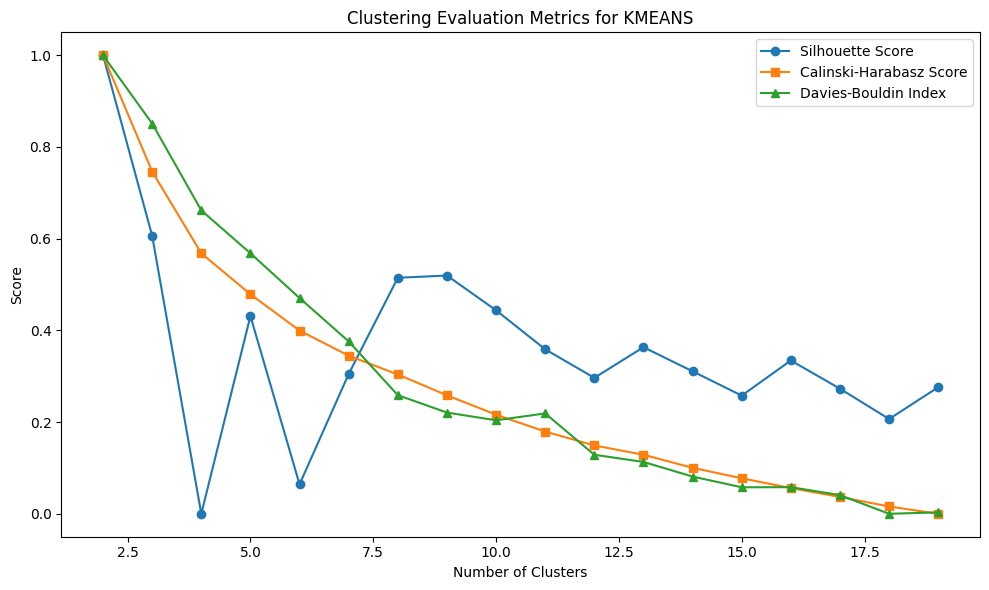

In [71]:
minmaxscaler = MinMaxScaler()

silhouette_scores = np.array(silhouette_scores)
calinski_harabasz_scores = np.array(calinski_harabasz_scores)
davies_bouldin_scores = np.array(davies_bouldin_scores)

silhouette_scores = minmaxscaler.fit_transform(silhouette_scores.reshape(-1, 1))
calinski_harabasz_scores = minmaxscaler.fit_transform(calinski_harabasz_scores.reshape(-1, 1))
davies_bouldin_scores = minmaxscaler.fit_transform(davies_bouldin_scores.reshape(-1, 1))


# Plot the results
fig, axes = plt.subplots(1, 1, figsize=(10, 6))


ax = axes
    
ax.plot(n_clusters_range, silhouette_scores, label='Silhouette Score', marker='o')
ax.plot(n_clusters_range, calinski_harabasz_scores, label='Calinski-Harabasz Score', marker='s')
ax.plot(n_clusters_range, davies_bouldin_scores, label='Davies-Bouldin Index', marker='^')

ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.set_title(f'Clustering Evaluation Metrics for KMEANS')
ax.legend()

plt.tight_layout()
plt.show()

#### See how the Agglomerative Clustering evolves depending on its hyper parameters

In [ ]:
metrics = {"euclidean", "cosine"}
n_clusters_range = range(2, 20)
linkages = {"ward", "complete", "average", "single"}

silhouette_scores = {metric: [] for metric in metrics}
calinski_harabasz_scores = {metric: [] for metric in metrics}
davies_bouldin_scores = {metric: [] for metric in metrics}

for metric in metrics:
    for n_clusters in n_clusters_range:
        model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage='average')
        labels = model.fit_predict(data)
        
        sil_score = silhouette_score(data, labels, metric=metric)
        cal_score = calinski_harabasz_score(data, labels)
        dav_score = davies_bouldin_score(data, labels)
        
        silhouette_scores[metric].append(sil_score)
        calinski_harabasz_scores[metric].append(cal_score)
        davies_bouldin_scores[metric].append(dav_score)

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 6))

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    ax.scatter(n_clusters_range, silhouette_scores[metric], label='Silhouette Score', marker='o')
    ax.scatter(n_clusters_range, calinski_harabasz_scores[metric], label='Calinski-Harabasz Score', marker='s')
    ax.scatter(n_clusters_range, davies_bouldin_scores[metric], label='Davies-Bouldin Index', marker='^')

    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Score')
    ax.set_title(f'Clustering Evaluation Metrics for {metric} Metric')
    ax.legend()

plt.tight_layout()
plt.show()

In [125]:
model = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='average')
labels = model.fit_predict(data)
visualize_clusters(bdd_2D_ACCP, labels,'Cosine metric for 2 clusters')

In [72]:
bdd_2D_HCP[labels == 0]['Pred'].mean()

0.8108108108108109

In [62]:
bdd_2D_HCP['Pred'].mean()

0.6382405745062837

<Figure size 640x480 with 0 Axes>

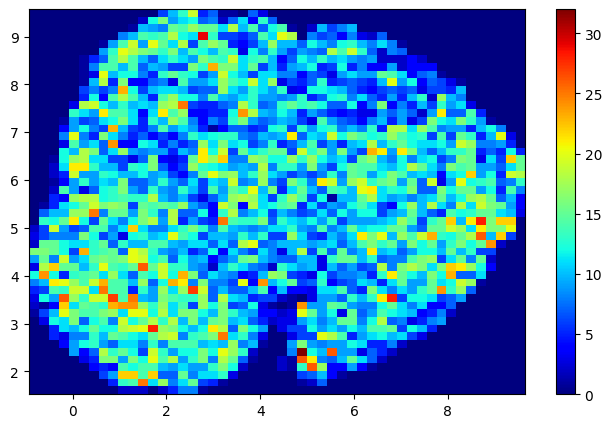

In [63]:
import matplotlib.cm as cm
heatmap, xedges, yedges = np.histogram2d(bdd_2D_UKB['Dim 1'], bdd_2D_UKB['Dim 2'], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.figure(figsize=(8,5))
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()